In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import classification_report, confusion_matrix

2024-05-09 13:35:30.692146: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-05-09 13:35:30.963255: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-09 13:35:30.963290: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-09 13:35:31.013478: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-09 13:35:31.103895: I tensorflow/core/platform/cpu_feature_guar

In [11]:
data = pd.read_csv('sentiment-analysis.csv',sep=', ')
data.columns = data.columns.str.replace('"', '')
data = data.dropna() 
data['Text'] = data['Text'].astype(str)
data.head()

/tmp/ipykernel_17138/695249325.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data = pd.read_csv('sentiment-analysis.csv',sep=', ')


,Text,Sentiment,Source,Date/Time,User ID,Location,Confidence Score
0,"""""""I love this product!""""",Positive,Twitter,2023-06-15 09:23:14,@user123,New York,"0.85"""
1,"""""""The service was terrible.""""",Negative,Yelp Reviews,2023-06-15 11:45:32,user456,Los Angeles,"0.65"""
2,"""""""This movie is amazing!""""",Positive,IMDb,2023-06-15 14:10:22,moviefan789,London,"0.92"""
3,"""""""I'm so disappointed with their customer sup...",Negative,Online Forum,2023-06-15 17:35:11,forumuser1,Toronto,"0.78"""
4,"""""""Just had the best meal of my life!""""",Positive,TripAdvisor,2023-06-16 08:50:59,foodie22,Paris,"0.88"""


In [12]:
le = LabelEncoder()
data['Sentiment_encoded'] = le.fit_transform(data['Sentiment'])

In [13]:
X = data['Text']
y = data['Sentiment_encoded']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

max_words = 10000  # Maximum number of words in your vocabulary
max_len = 512  # Maximum length of input sequences

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

In [15]:
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)


In [17]:
embedding_dim = 100  # Dimension of word embeddings
lstm_units = 512  # Number of LSTM units

model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(units=lstm_units, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=25, batch_size=16)

Epoch 1/25


2024-05-09 13:47:49.779114: I external/local_xla/xla/service/service.cc:168] XLA service 0x7fc80fcdc550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-05-09 13:47:49.779147: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4050 Laptop GPU, Compute Capability 8.9
2024-05-09 13:47:49.794455: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-05-09 13:47:50.214721: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1715242670.287842   22117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5/5 [==============================] - 17s 3s/step - loss: 0.6921 - accuracy: 0.5395
Epoch 2/25
5/5 [==============================] - 14s 3s/step - loss: 0.6878 - accuracy: 0.6316
Epoch 3/25
5/5 [==============================] - 13s 3s/step - loss: 0.6452 - accuracy: 0.8421
Epoch 4/25
5/5 [==============================] - 14s 3s/step - loss: 0.5839 - accuracy: 0.8684
Epoch 5/25
5/5 [==============================] - 12s 2s/step - loss: 2.1349 - accuracy: 0.6842
Epoch 6/25
5/5 [==============================] - 14s 3s/step - loss: 4.9732 - accuracy: 0.5000
Epoch 7/25
5/5 [==============================] - 14s 3s/step - loss: 2.4740 - accuracy: 0.5000
Epoch 8/25
5/5 [==============================] - 14s 3s/step - loss: 1.2372 - accuracy: 0.3816
Epoch 9/25
5/5 [==============================] - 14s 3s/step - loss: 0.7917 - accuracy: 0.5000
Epoch 10/25
5/5 [==============================] - 14s 3s/step - loss: 0.7065 - accuracy: 0.5000
Epoch 11/25
5/5 [==============================] -

1/1 [==============================] - 1s 611ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.80      0.62         5
           1       0.92      0.73      0.81        15

    accuracy                           0.75        20
   macro avg       0.71      0.77      0.72        20
weighted avg       0.81      0.75      0.76        20

Confusion Matrix:
 [[ 4  1]
 [ 4 11]]


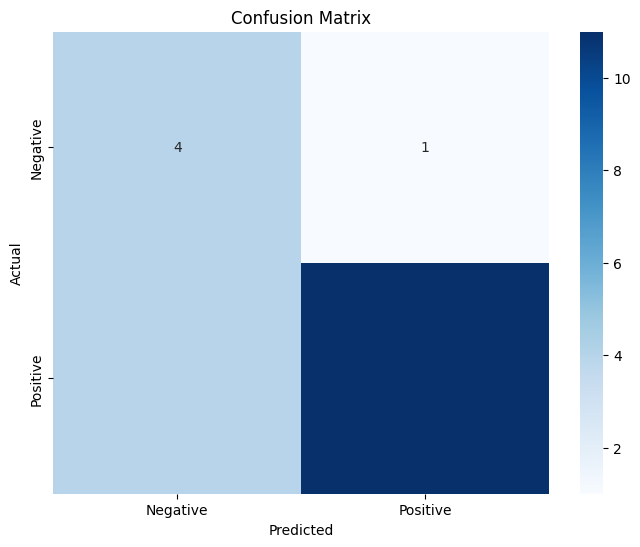

In [18]:
y_pred_probs = model.predict(X_test_pad)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# VISUALIZE CONFUSION MARTIX
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [19]:
## save the model
model.save('sentiment-analysis.h5')

/home/aneaser/DataScience/ds/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
from tensorflow import keras

loaded_model = keras.models.load_model('sentiment-analysis.h5')

# Test the model
test_sentence = "I love this movie!"
test_sentence_seq = tokenizer.texts_to_sequences([test_sentence])
test_sentence_pad = pad_sequences(test_sentence_seq, maxlen=max_len)

y_pred_probs = loaded_model.predict(test_sentence_pad)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()
print(y_pred)

1/1 [==============================] - 1s 584ms/step
[1]
